# official tutorial

https://gym.openai.com/docs/

In [ ]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action

# 上記はjupyter上ではうまくいかない（？）ので

In [1]:
import gym
from matplotlib import animation
from matplotlib import pyplot as plt

## animationをjupyter上で見ることを可能にするおまじない

以下のいずれかを使う（？）

In [2]:
%matplotlib nbagg

In [ ]:
%matplotlib notebook

## imshowで表示可能なrgb_arrayのリストとして出力

In [3]:
env = gym.make('CartPole-v0')
env.reset()
frames = []
for i in range(5000):
    #frames.append(env.render(mode = 'rgb_array'))
    #env.step(env.action_space.sample()) # take a random action
    #observation, reward, done, info = env.step(action)
    
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
    if done:
        break
    if i % 50 == 0:
        print(i)
env.render()

0


True

## object oriented versionの試み

<IPython.core.display.Javascript object>


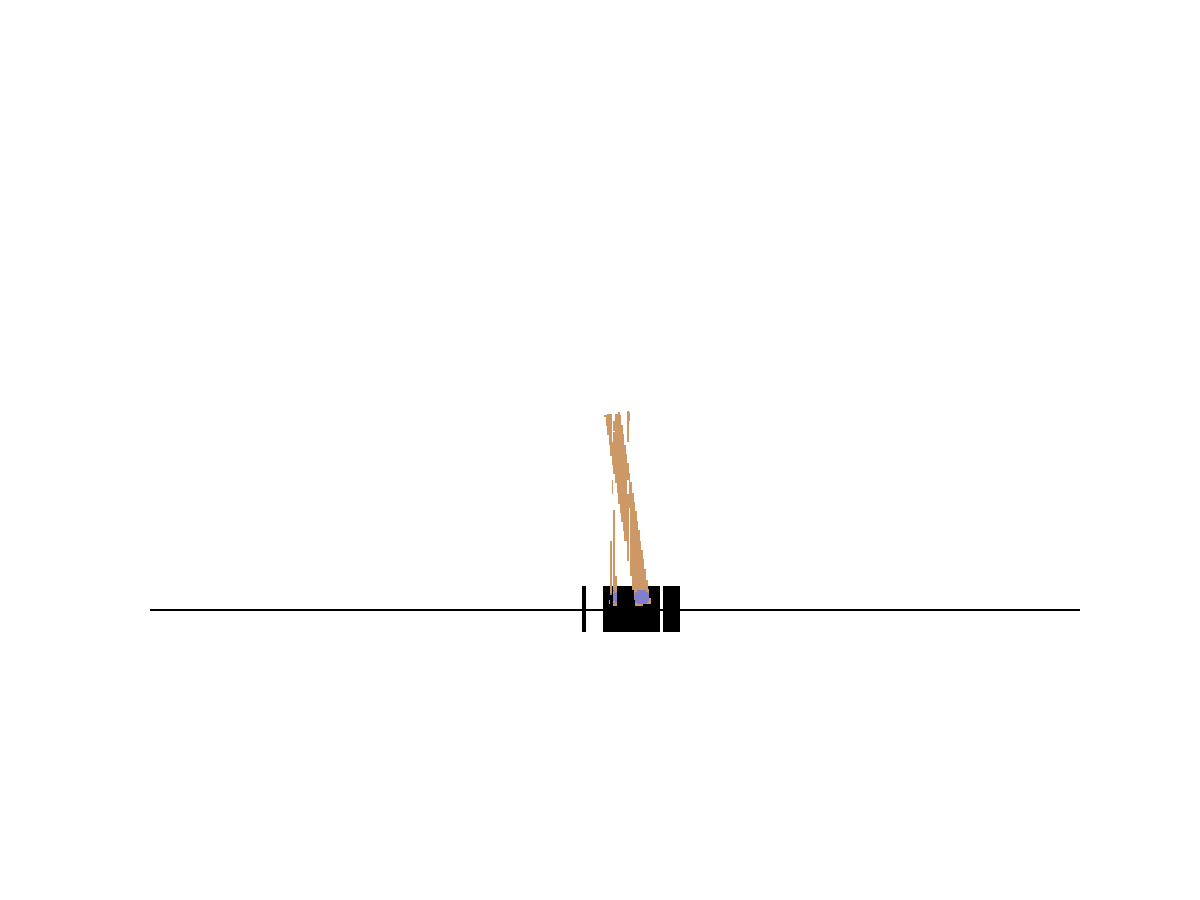

(0.0, 1.0, 0.0, 1.0)

In [4]:
fig = plt.figure()

ax = fig.add_subplot("111")

ax.axis('off')

In [5]:
patch = ax.imshow(frames[0])

imshowにdataをセットするだけでスクリーン上に反映される:

In [6]:
def animate(i):
    patch.set_data(frames[i])

In [7]:
anim = animation.FuncAnimation(fig, animate, frames = len(frames), interval=150)

<IPython.core.display.Javascript object>


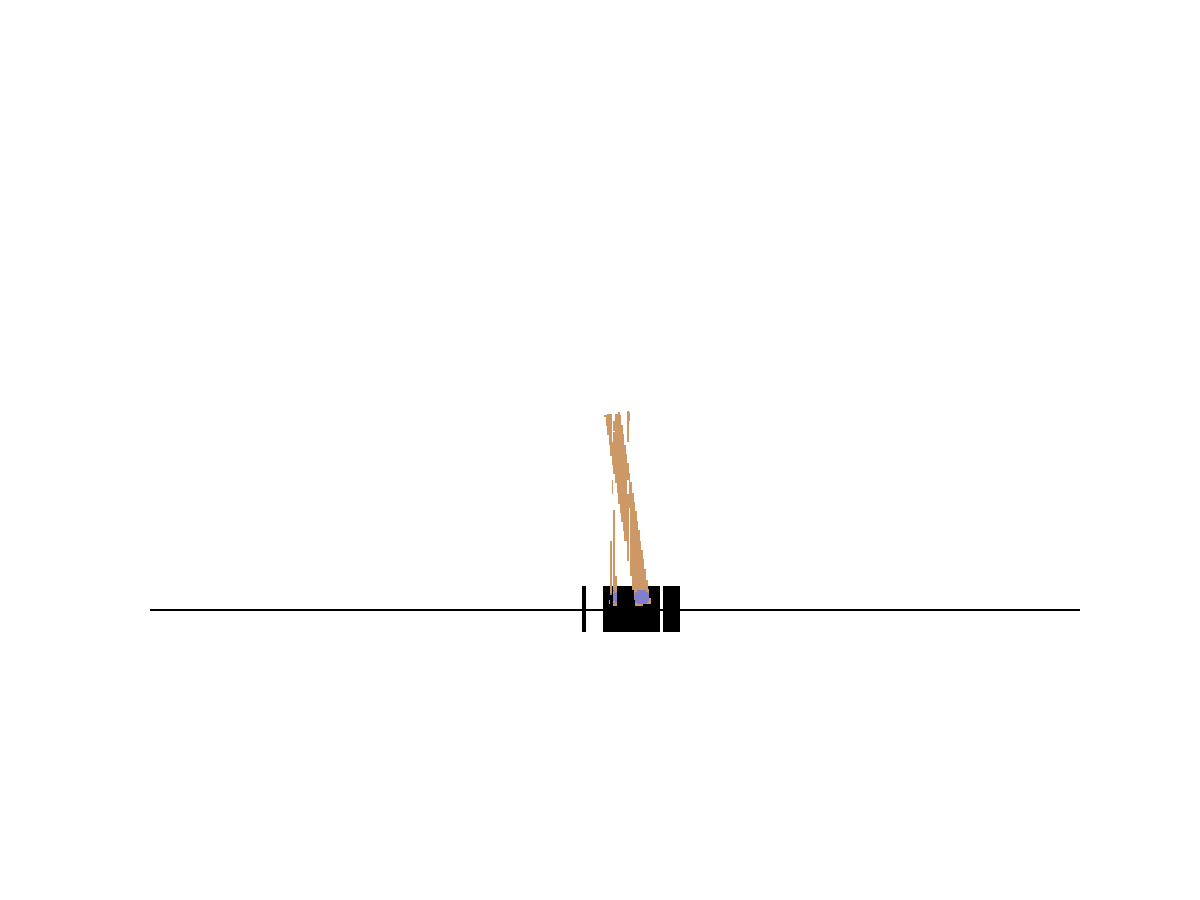

In [8]:
fig

# working example of animation on jupyter

https://qiita.com/mittyantest/items/2ea07b0f8d5976f29da9

をほんのちょっとだけ変更（renderの引数をなくした）

途中で分割するとうまくいかない

In [ ]:
import gym
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib nbagg

env = gym.make('CartPole-v0')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.render()

fig = plt.gcf()
patch = plt.imshow(frames[0])
plt.axis('off')

def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(fig, animate, frames = len(frames), interval=50)
anim

# sandbox

http://hirotaka-hachiya.hatenablog.com/entry/2018/05/28/185128

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import gym

In [ ]:
%matplotlib nbagg

In [ ]:
from matplotlib import animation

In [ ]:
from IPython.display import display

In [ ]:
env = gym.make('MountainCar-v0')

In [ ]:
env.reset()

In [ ]:
env.render()